In [ ]:
import pandas as pd
from google.colab import files
from google.colab import drive
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import cross_val_score
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import metrics
import warnings
import io

uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

data.info()
#There are no null values


Saving heart.csv to heart.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#Exploring the data
data.describe()
#We don't observe any noticeable difference in the data using the describe function.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#identify duplicate rows
duplicateRows = data[data.duplicated()]

#view duplicate rows
duplicateRows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data.drop_duplicates(inplace=True)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:

#Renaming columns
data = data.rename(columns={'age': 'Age', 'sex': 'Sex', 'cp': 'ChestPain', 'trestbps':'RestingBP','chol':'Cholesterol'
                       ,'fbs':'FastingBS','restecg':'RestingECG', 'thalach': 'Max HR','exang':'ExerciseAngina',
                        'oldpeak': 'Oldpeak','slope':'ST_Slope', 'ca':'NumberOfVessel', 'thal':'Thal','target':'HeartDisease'})


#data exploration and cleansing
data.isnull().sum()
#There are no null values


Age               0
Sex               0
ChestPain         0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
Max HR            0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
NumberOfVessel    0
Thal              0
HeartDisease      0
dtype: int64

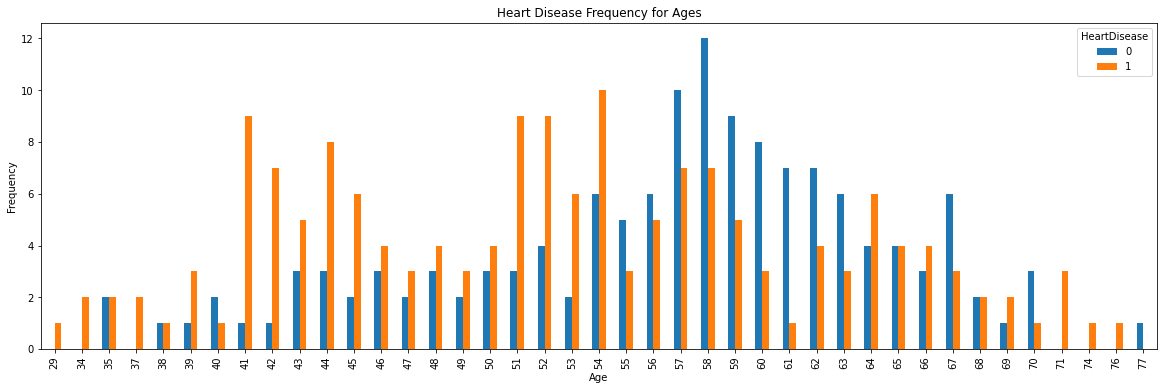

In [ ]:
pd.crosstab(data.Age,data.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

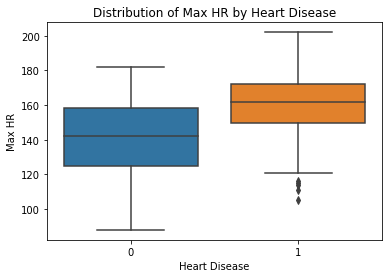

In [52]:
# Boxplot of Maximum Heart rate agaisnt heart disease
sns.boxplot(x='HeartDisease', y='Max HR', data=data)
plt.xlabel('Heart Disease')
plt.ylabel('Max HR')
plt.title('Distribution of Max HR by Heart Disease')
plt.show()


In [ ]:
#Data imbalance check

labels=["Healthy","Heart Disease"]

healthy_or_not = data['HeartDisease'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]

fig = go.Figure(data=[go.Pie(labels=labels, values=data['HeartDisease'].value_counts())])
fig.update_traces(marker=dict(colors=["green", "maroon"]))

fig.show()

#We can see that the data is quite well balanced so we don't need to take advantage of undersampling or oversampling techniques.


<AxesSubplot:>

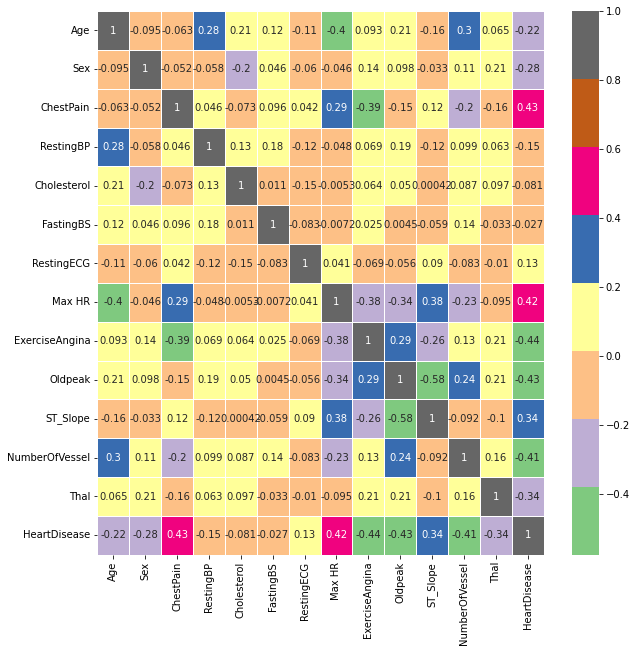

In [ ]:

# Checking correlation between features
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
correlation_before_outliers = data.corr() 
sns.heatmap(data=correlation_before_outliers,cmap="Accent", annot=True,linewidths=.5, ax=ax)


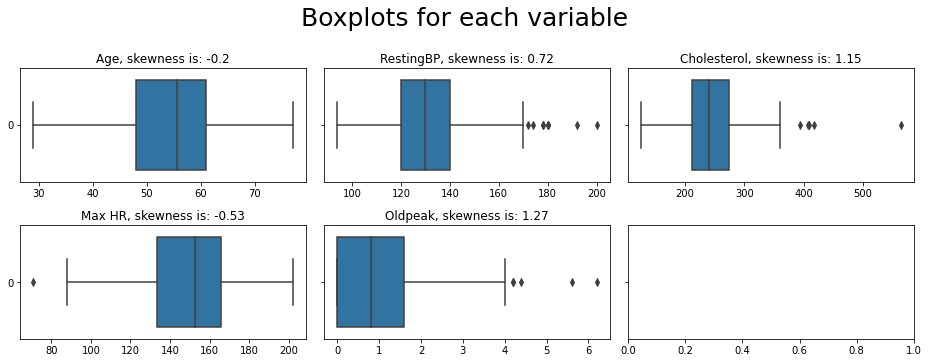

In [ ]:
# Identifying numerical and categorical columns
numerical_cols = list(data.loc[:,['Age', 'RestingBP', 'Cholesterol', 'Max HR', 'Oldpeak']])
categorical_cols = list(data.loc[:,['Sex', 'ChestPain', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

#Check for outliers using  boxplots

def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=data, columns_list=numerical_cols, rows=2, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()
#We can observe outliers on the dataset


In [ ]:
#Showing percentage of outliers

# Store the initial total number of entries
total_entries = data.shape[0]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Column", "Number of outliers", "Percentage of outliers"])

# Loop over each numeric column in the DataFrame
for col in data.select_dtypes(include=['number']).columns:
    # Compute the first and third quartiles
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    
    # Compute the interquartile range
    iqr = q3 - q1
    
    # Compute the outlier fences
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    
    # Compute the number of outliers in this column
    num_outliers = np.sum((data[col] < fence_low) | (data[col] > fence_high))
    
    # Compute the percentage of outliers in this column
    percent_outliers = num_outliers / total_entries * 100
    
   # Add the results for this column to the DataFrame
    results_df = results_df.append({
        "Column": col,
        "Number of outliers": num_outliers,
        "Percentage of outliers": percent_outliers
    }, ignore_index=True)

# Display the results DataFrame as a grid
display(results_df)

,Column,Number of outliers,Percentage of outliers
0,Age,0,0.000000
1,Sex,0,0.000000
2,ChestPain,0,0.000000
3,RestingBP,9,2.980132
4,Cholesterol,5,1.655629
5,FastingBS,45,14.900662
6,RestingECG,0,0.000000
7,Max HR,1,0.331126
8,ExerciseAngina,0,0.000000
9,Oldpeak,5,1.655629


In [ ]:
#Drop the outliers

outliers = data.shape[0]

# Loop over each numerical column in the DataFrame
for col in data.select_dtypes(include=['number']).columns:
     
    # Compute the first and third quartiles
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    
    # Compute the interquartile range
    iqr = q3 - q1
    
    # Compute the Tukey fences
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    
    
    # Identify the rows with values outside of the lower and upper bounds for this column
    outliers = (data[col] < fence_low) | (data[col] > fence_high)

    # Drop the outliers from the DataFrame
    data = data[~outliers]
    
    # Print the results for this column
    print("Column:", col)
    print("Total entries:", total_entries)
    print("Number of outliers:", num_outliers)
    print("Percentage of outliers:", percent_outliers,"%")
    print()

# Reset the index of the DataFrame
data = data.reset_index(drop=True)
data.info()

Column: Age
Total entries: 302
Number of outliers: 0
Percentage of outliers: 0.0 %

Column: Sex
Total entries: 302
Number of outliers: 0
Percentage of outliers: 0.0 %

Column: ChestPain
Total entries: 302
Number of outliers: 0
Percentage of outliers: 0.0 %

Column: RestingBP
Total entries: 302
Number of outliers: 0
Percentage of outliers: 0.0 %

Column: Cholesterol
Total entries: 302
Number of outliers: 0
Percentage of outliers: 0.0 %

Column: FastingBS
Total entries: 302
Number of outliers: 0
Percentage of outliers: 0.0 %

Column: RestingECG
Total entries: 302
Number of outliers: 0
Percentage of outliers: 0.0 %

Column: Max HR
Total entries: 302
Number of outliers: 0
Percentage of outliers: 0.0 %

Column: ExerciseAngina
Total entries: 302
Number of outliers: 0
Percentage of outliers: 0.0 %

Column: Oldpeak
Total entries: 302
Number of outliers: 0
Percentage of outliers: 0.0 %

Column: ST_Slope
Total entries: 302
Number of outliers: 0
Percentage of outliers: 0.0 %

Column: NumberOfVess

<AxesSubplot:>

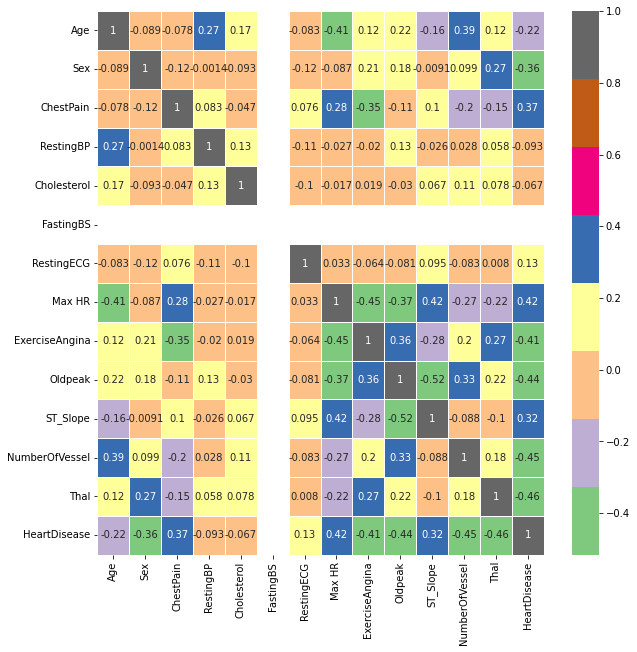

In [ ]:
# Checking correlation after dropping outliers
data.corr()

ig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
correlation_after_outliers = data.corr()
sns.heatmap(data=correlation_after_outliers,cmap="Accent", annot=True,linewidths=.5, ax=ax)

#No high correlation between features


In [ ]:
#[11] A. Nair, “Targeting Multicollinearity With Python,” Medium, Dec. 06, 2021. https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b (accessed Mar. 09, 2023).

#Scaling to find multicollinearity in the dataset using Variance Inflation Factor (VIF) 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Separate the target variable from the feature variables
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Scale the feature variables to have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the VIF scores for each feature variable
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Print the VIF scores
print(vif)

# Remove the feature variable with the highest VIF score and recalculate the VIF scores
while vif['VIF'].max() > 5:
    # Remove the feature variable with the highest VIF score
    max_vif_idx = vif['VIF'].idxmax()
    vif.drop(max_vif_idx, axis=0, inplace=True)
    
    # Recalculate the VIF scores
    X_scaled = np.delete(X_scaled, max_vif_idx, axis=1)
    vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Print the selected feature variables
print(vif['Features'])


          Features       VIF
0              Age  1.545705
1              Sex  1.197948
2        ChestPain  1.210204
3        RestingBP  1.145340
4      Cholesterol  1.084725
5        FastingBS       NaN
6       RestingECG  1.063983
7           Max HR  1.736666
8   ExerciseAngina  1.494139
9          Oldpeak  1.707722
10        ST_Slope  1.564856
11  NumberOfVessel  1.372861
12            Thal  1.197062
0                Age
1                Sex
2          ChestPain
3          RestingBP
4        Cholesterol
5          FastingBS
6         RestingECG
7             Max HR
8     ExerciseAngina
9            Oldpeak
10          ST_Slope
11    NumberOfVessel
12              Thal
Name: Features, dtype: object


/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning:

invalid value encountered in double_scalars



Confusion Matrix:
 [[13  2]
 [ 2 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.94      0.94      0.94        31

    accuracy                           0.91        46
   macro avg       0.90      0.90      0.90        46
weighted avg       0.91      0.91      0.91        46

Accuracy: 0.9130
Precision: 0.9355
Recall: 0.9355
F1 Score: 0.9355


<AxesSubplot:>

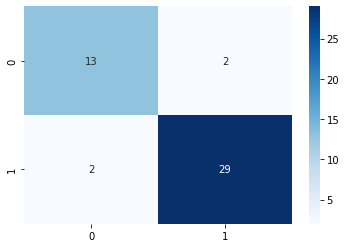

In [ ]:
# [12]“Generate classification report and confusion matrix in Python -,” DeZyre. https://www.projectpro.io/recipes/generate-classification-report-and-confusion-matrix-in-python

#Logistic Regression with Train test split : 80:20 split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Separate features from target
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf_model = LogisticRegression()
clf_model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = clf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plotting the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")

In [44]:
#Logistic Regression with cross validation
# Separate features from target
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Train a logistic regression model
clf_model = LogisticRegression()

# Evaluate the model using cross-validation
cv_scores = cross_val_score(clf_model, X, y, cv=10)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

# Fit the model on the entire dataset
clf_model.fit(X, y)

# Predict on the entire dataset
y_pred = clf_model.predict(X)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
confusion_mat = confusion_matrix(y, y_pred)

print("\nConfusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", classification_report(y, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Cross-validation scores: [0.86956522 0.7826087  0.91304348 0.91304348 0.91304348 0.91304348
 0.91304348 0.82608696 0.81818182 0.90909091]
Mean CV score: 0.8771
Standard deviation: 0.0475

Confusion Matrix:
 [[ 75  21]
 [  7 125]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        96
           1       0.86      0.95      0.90       132

    accuracy                           0.88       228
   macro avg       0.89      0.86      0.87       228
weighted avg       0.88      0.88      0.88       228

Accuracy: 0.8772
Precision: 0.8562
Recall: 0.9470
F1 Score: 0.8993


In [ ]:
# Using hyperparaters to train the Logistic regression model
warnings.filterwarnings("ignore")
X = data.drop('HeartDisease', axis=1) # separate features from target
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_model2 = LogisticRegression()

# Define the hyperparameters to tune
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# Use GridSearchCV to find the optimal hyperparameters
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search_lr = GridSearchCV(clf_model2, hyperparameters, cv=kfold, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_params = grid_search_lr.best_params_

print('Best hyperparameters:', grid_search_lr.best_params_)
print('Best cross-validation score:', grid_search_lr.best_score_)

# Train the logistic regression model with the best hyperparameters on training set
best_lr = LogisticRegression(random_state=42, **best_params)
best_lr.fit(X_train, y_train)

# Make predictions on new data
y_pred = best_lr.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
cv_scores = cross_val_score(best_lr, X, y, cv=10)

# Calculate and print the accuracy score on the test data
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)


print("\nConfusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Best hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.87375
Test accuracy: 0.8405797101449275

Confusion Matrix:
 [[25  4]
 [ 7 33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.89      0.82      0.86        40

    accuracy                           0.84        69
   macro avg       0.84      0.84      0.84        69
weighted avg       0.85      0.84      0.84        69

Accuracy: 0.8406
Precision: 0.8919
Recall: 0.8250
F1 Score: 0.8571


In [ ]:
#Using Random Forest Algorithm
warnings.filterwarnings("ignore")
X = data.drop('HeartDisease', axis = 1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

rfc = RandomForestClassifier()

hyperparameters = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search_rfc = GridSearchCV(rfc, hyperparameters, cv = kfold, scoring='accuracy')
grid_search_rfc.fit(X_train, y_train)
print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_score_)

# Train the random forest classifier on the best hyperparameters
best_rfc = RandomForestClassifier(**grid_search_rfc.best_params_, random_state=42)
best_rfc.fit(X_train, y_train)

# Test the random forest classifier on the testing set
y_pred = best_rfc.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
cv_scores = cross_val_score(best_lr, X, y, cv=10)

# Calculate and print the accuracy score on the test data
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

print("\nConfusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

{'max_depth': 10, 'max_features': 1}
0.8608333333333332
Test accuracy: 0.8405797101449275

Confusion Matrix:
 [[21  8]
 [ 3 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79        29
           1       0.82      0.93      0.87        40

    accuracy                           0.84        69
   macro avg       0.85      0.82      0.83        69
weighted avg       0.84      0.84      0.84        69

Accuracy: 0.8406
Precision: 0.8222
Recall: 0.9250
F1 Score: 0.8706


In [ ]:
#Using Neural Networks algorithm using Sequential or RNN
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

# Split data into features and target variable
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Make predictions on the test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
cv_scores = cross_val_score(best_lr, X, y, cv=10)

# Calculate and print the accuracy score on the test data
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

# Calculate and print the classification report and confusion matrix on the test data
print("Classification report:\n", metrics.classification_report(y_test, y_pred))
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))




Epoch 1/500
5/5 [==============================] - 2s 75ms/step - loss: 10.5567 - accuracy: 0.5448 - val_loss: 1.2952 - val_accuracy: 0.4865
Epoch 2/500
5/5 [==============================] - 0s 17ms/step - loss: 4.0597 - accuracy: 0.4552 - val_loss: 4.0731 - val_accuracy: 0.4324
Epoch 3/500
5/5 [==============================] - 0s 19ms/step - loss: 2.1432 - accuracy: 0.5310 - val_loss: 2.7454 - val_accuracy: 0.5946
Epoch 4/500
5/5 [==============================] - 0s 23ms/step - loss: 3.2992 - accuracy: 0.5517 - val_loss: 1.8071 - val_accuracy: 0.5946
Epoch 5/500
5/5 [==============================] - 0s 16ms/step - loss: 1.4747 - accuracy: 0.5448 - val_loss: 2.4791 - val_accuracy: 0.4595
Epoch 6/500
5/5 [==============================] - 0s 13ms/step - loss: 1.6909 - accuracy: 0.5103 - val_loss: 1.1829 - val_accuracy: 0.6486
Epoch 7/500
5/5 [==============================] - 0s 13ms/step - loss: 1.6955 - accuracy: 0.5724 - val_loss: 1.0853 - val_accuracy: 0.6486
Epoch 8/500
5/5 [==

In [ ]:
#Using Neural Networks algorithm using Multi-Layer Perceptron (MLP) binary classification model
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
from keras.layers import Input, Dense
from keras.models import Model

# Split data into features and target variable
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
inputs = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Make predictions on the test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
cv_scores = cross_val_score(best_lr, X, y, cv=10)

# Calculate and print the accuracy score on the test data
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)
print("\nConfusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/100
5/5 [==============================] - 1s 41ms/step - loss: 5.5617 - accuracy: 0.4552 - val_loss: 1.1005 - val_accuracy: 0.5946
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 2.2781 - accuracy: 0.5586 - val_loss: 2.0008 - val_accuracy: 0.5676
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 1.5786 - accuracy: 0.5931 - val_loss: 0.9194 - val_accuracy: 0.5946
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 1.2134 - accuracy: 0.5655 - val_loss: 1.1508 - val_accuracy: 0.5405
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.9244 - accuracy: 0.5724 - val_loss: 0.6920 - val_accuracy: 0.6216
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.8965 - accuracy: 0.5862 - val_loss: 0.6081 - val_accuracy: 0.6757
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 0.7242 - accuracy: 0.6483 - val_loss: 0.7546 - val_accuracy: 0.6486
Epoch 8/100
5/5 [=====

Test accuracy: 0.8695651888847351
2/2 [==============================] - 0s 9ms/step
Test accuracy: 0.8695652173913043

Confusion Matrix:
 [[ 9  6]
 [ 0 31]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.84      1.00      0.91        31

    accuracy                           0.87        46
   macro avg       0.92      0.80      0.83        46
weighted avg       0.89      0.87      0.86        46

Accuracy: 0.8696
Precision: 0.8378
Recall: 1.0000
F1 Score: 0.9118
